Gradient descent
===
Gradient descent is a near-universal technique in numerical optimisation, underpinning large sections of the computer science/machine learning/astronomy literature.
This notebook aims to provide a high-level overview of the method, to help provide intuition and context for it's deployment in more complex situations.

In this notebook:
- What is gradient descent?
- Why 'normal' gradient descent for ML over other algorithms?
- Developing an intuition for the gradient descent algorithm: learning rate, dimensionality, where gradient descent goes wrong and how to fix it.
- Stochastic gradient descent - what do we do when our models/datasets get big or high-dimensional?
- Advanced patterns: adaptive flavours of gradient descent (Adam) and introducing momentum.

In [7]:
import jax
jax.config.update("jax_enable_x64", True)  # force JAX to use 64-bit mode
jnp = jax.numpy

import matplotlib.pyplot as plt

Test functions
---
To test gradient descent and provide example functions to optimise, we define some example functions below.
These can be swapped in and out of the cells to follow depending on what you prefer.

More info:
Himmelblau's function: [Wikipedia](https://en.wikipedia.org/wiki/Himmelblau%27s_function)
Rosenbrock 'banana' function: [Wikipedia](https://en.wikipedia.org/wiki/Rosenbrock_function)

Number of function evaluations: 250000


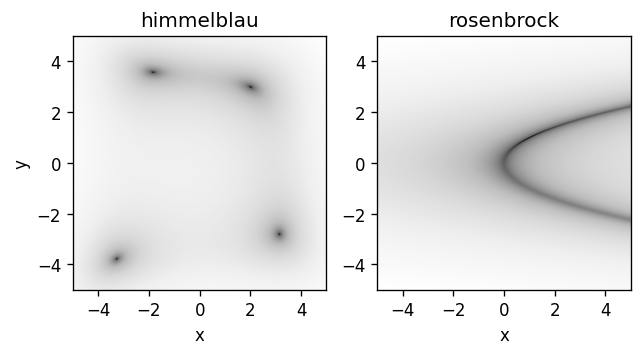

In [100]:
def himmelblau(x: jnp.ndarray, y: jnp.ndarray) -> jnp.ndarray:
    """
    Himmelblau test function for optimisation - has 4 global minima to find.
    """
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def rosenbrock(x: jnp.ndarray, y: jnp.ndarray, a=1, b=100) -> jnp.ndarray:
    """
    Rosenbrock banana function - one global minimum at (0, 0)
    """
    return (a - x)**2 + b*(y - x**2)**2

objective_funcs = [himmelblau, rosenbrock]

# here we define a plotting grid to visualise the test functions.
n_grid_points = 500
ygrid, xgrid = jnp.meshgrid(jnp.linspace(-5, 5, n_grid_points), jnp.linspace(-5, 5, n_grid_points))
print(f"Number of function evaluations: {n_grid_points * n_grid_points}")

fig, axes = plt.subplots(1, len(objective_funcs), sharey='col', dpi=120)

for ax, objfunc in zip(axes, objective_funcs):
    z_func = objfunc(xgrid, ygrid)
    ax.imshow(jnp.log10(z_func), origin='lower', extent=[-5, 5, -5, 5], cmap='Greys_r', interpolation='lanczos')
    ax.set_xlabel("x")
    ax.set_title(objfunc.__name__)

axes[0].set_ylabel("y")
plt.show()

Gradient descent
---